## Imports

In [1]:
import numpy as np
from numpy import pi, cos, sin, array

In [2]:
from scipy.linalg import toeplitz, inv

In [3]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
np.set_printoptions(precision=4, suppress=True)

In [4]:
from warnings import filterwarnings
filterwarnings('ignore', category=UserWarning)

## Zero Forcing Equalizer

In [5]:
x = np.random.choice([-1, 1], 40)
channel = array([.1, -.1, 0.05, 1, .05])

y = np.convolve(x, channel)

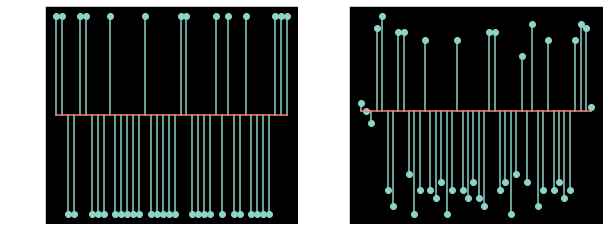

In [6]:
_, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].stem(x)
ax[1].stem(y);

In [7]:
# 6 tap equalizer
taps = 6
Y = toeplitz(y[taps-1:taps-1+taps], np.flip(y[:taps]))
C = inv(Y)@x[:taps]
C

array([-0.2683,  0.1318,  0.555 ,  0.1171, -0.1395,  0.0829])

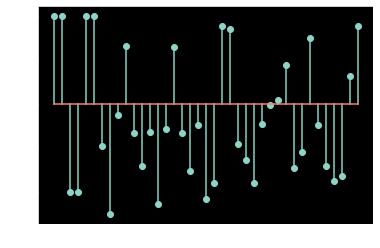

In [8]:
x_est = np.convolve(y, C, 'valid') # x_est is shorter than x because of 'valid'
plt.stem(x_est);